In [363]:
import pandas as pd
import numpy as np

In [364]:
df = pd.read_csv('/content/SMS_Spam_Dataset.csv')

In [365]:
df.shape

(5574, 2)

In [366]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [367]:
df.sample(5)

,Label,Message
1537,ham,How's it feel? Mr. Your not my real Valentine ...
1770,ham,Ha... Both of us doing e same thing. But i got...
2215,ham,Ok then i'll let him noe later n ask him call ...
3664,ham,Frnd s not juz a word.....not merely a relatio...
4044,ham,I am literally in bed and have been up for lik...


**`***Data cleaning ***`**

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [369]:
df.rename(columns={'Label':'target','Message':'text'},inplace=True)
df.sample(5)

,target,text
254,ham,"Ups which is 3days also, and the shipping comp..."
4396,ham,"Only just got this message, not ignoring you. ..."
2892,ham,"Yeah there's quite a bit left, I'll swing by t..."
1025,ham,Hasn't that been the pattern recently crap wee...
1383,ham,Its ok my arm is feeling weak cuz i got a shot...


In [370]:
from sklearn.preprocessing  import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [371]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [372]:
df.isnull().sum()

,0
target,0
text,0


In [373]:
df.duplicated().sum()

414

In [374]:
df = df.drop_duplicates(keep = 'first')

In [375]:
df.duplicated().sum()

0

In [376]:
df.shape

(5160, 2)

2_ Exploratory data analaysis ( EDA )

In [377]:
df['target'].value_counts()

,count
target,
0,4518
1,642


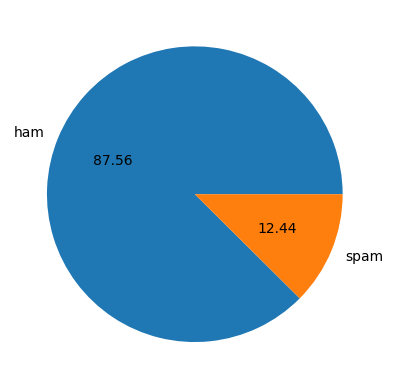

In [378]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

DATA IS IMBALANCED

In [379]:
import nltk

In [380]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [381]:
df['num_characters'] = df['text'].apply(len)

In [382]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [383]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Fetch number of words

In [384]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [385]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [386]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [387]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [388]:

df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5160.000000,5160.000000,5160.000000
mean,79.141279,18.581395,1.970543
std,58.289387,13.390781,1.455918
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [389]:
#HAM
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,70.860779,17.282205,1.827579
std,56.584730,13.572746,1.394245
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [390]:
#SPAM
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,642.000000,642.000000,642.000000
mean,137.414330,27.724299,2.976636
std,29.975596,7.028380,1.484527
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [391]:
# plotting histogram

import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

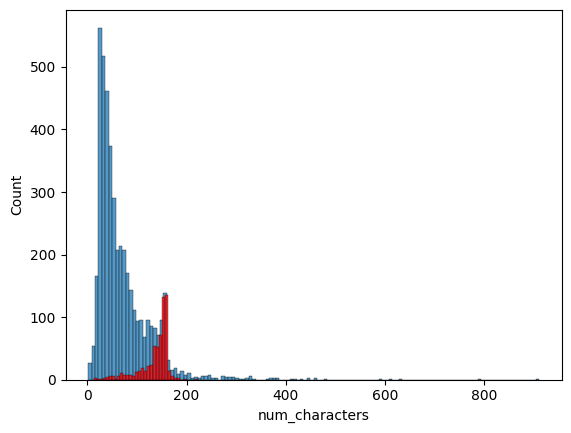

In [392]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

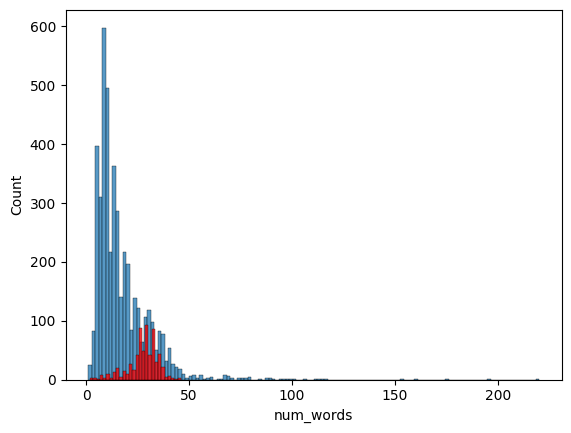

In [393]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

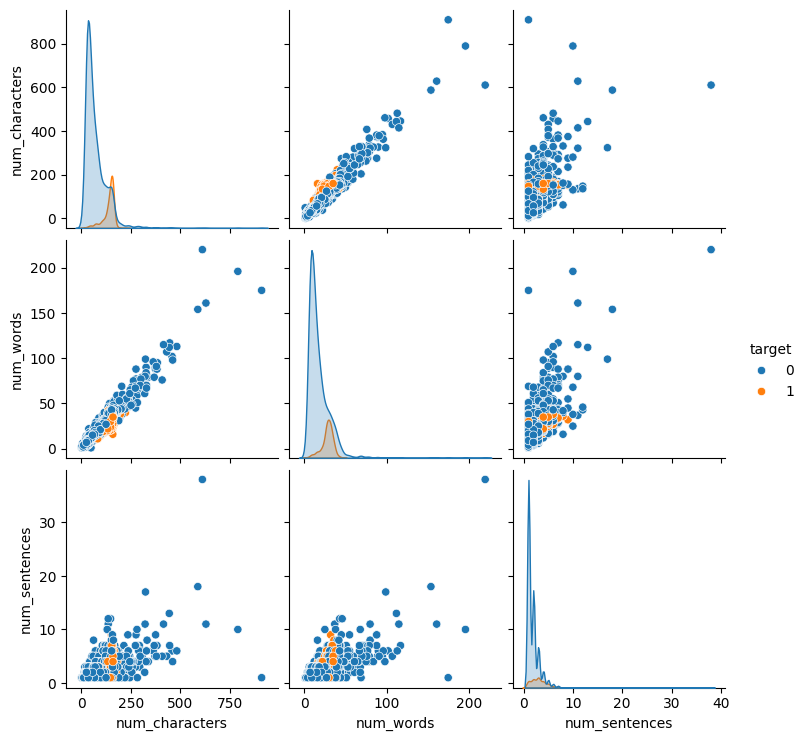

In [394]:
sns.pairplot(df,hue='target');



**DATA PREPROCESSING**
*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   stemming
















In [395]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [396]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string


def transform_text(text):
    ps = PorterStemmer()
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

result = transform_text('Hi *# how are you @ !! %%% ')
print(result)


hi


In [397]:
import nltk
from nltk.corpus import stopwords
import string



In [398]:
result = transform_text('Hi *# how are you @ !! %%% ')
print(result)

hi


In [399]:
transform_text("Hi, I'm about to turn 22, and although I haven't achieved any major milestones yet, I'm excited for what's to come!.")

'hi turn 22 although achiev major mileston yet excit come'

In [400]:
transform_text("Hi how are you rishi ?")

'hi rishi'

In [401]:
transform_text("Did you like presentation on  ml")

'like present ml'

In [402]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [403]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [404]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('jumping')

'jump'

In [405]:
df['transformed_text'] = df['text'].apply(transform_text)

In [406]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [407]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [408]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

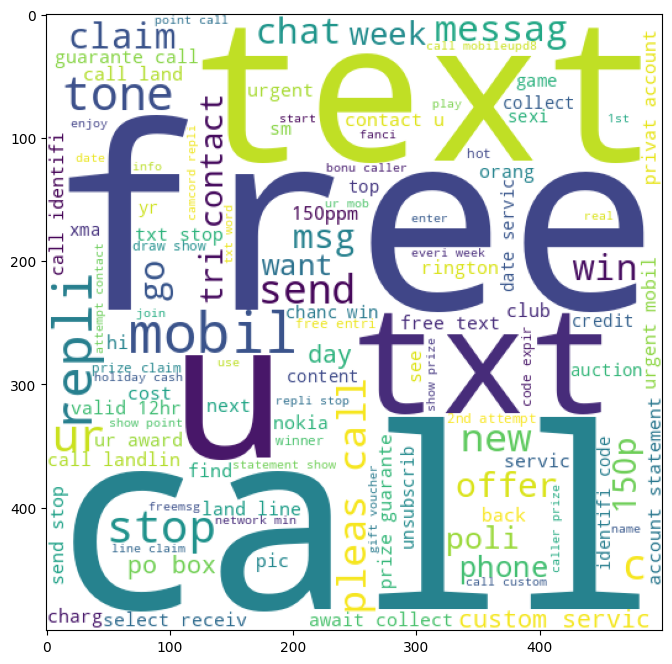

In [409]:
plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

In [410]:

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

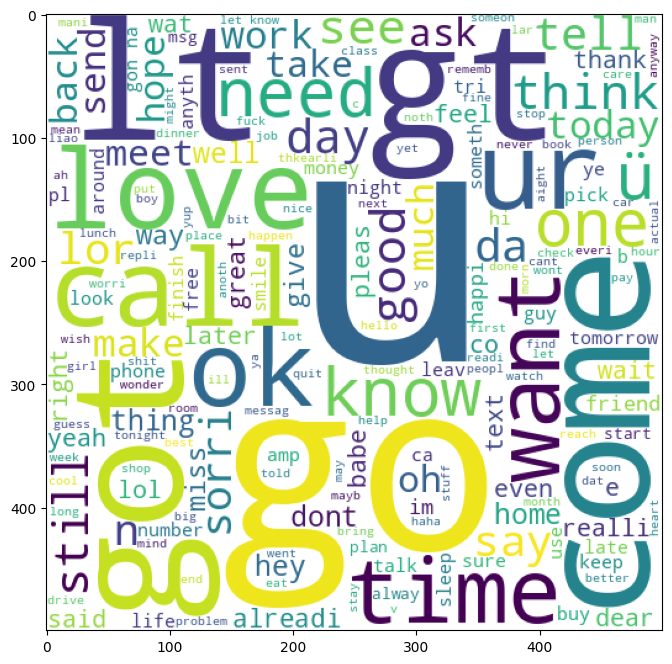

In [411]:
plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

In [412]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg:
    spam_corpus.append(word)

In [413]:
len(spam_corpus)

55520

MODEL BUILDING STARTING MACHINE LEARNING

In [414]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [415]:

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [416]:
X.shape

(5160, 3000)

In [417]:
Y = df['target'].values

In [418]:
Y.shape

(5160,)

In [419]:
from sklearn.model_selection import train_test_split

In [420]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [421]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [422]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

**here we are going to train on GaussianNB **

In [423]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8711240310077519
[[801 115]
 [ 18  98]]
0.460093896713615


**here we are going to train on MultinomialNB **

In [424]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9757751937984496
[[916   0]
 [ 25  91]]
1.0


here we are going to train on **BernoulliNB**

In [425]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[913   3]
 [ 14 102]]
0.9714285714285714


So we choosed  tfidf -->MNB

**from here we are trying with other machone learning models **

In [426]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [427]:

knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)


In [428]:
clfs = {

    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc

}

In [429]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [430]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738372093023255, 0.9587628865979382)

In [431]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.9234496124031008
Precision -  0.9743589743589743
For  NB
Accuracy -  0.9757751937984496
Precision -  1.0
For  DT
Accuracy -  0.9476744186046512
Precision -  0.8875
For  LR
Accuracy -  0.9515503875968992
Precision -  0.8837209302325582
For  RF
Accuracy -  0.9728682170542635
Precision -  0.9888888888888889


In [432]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [433]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [434]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.975775
1,RF,Accuracy,0.972868
2,KN,Accuracy,0.923450
3,DT,Accuracy,0.947674
4,LR,Accuracy,0.951550
5,NB,Precision,1.000000
6,RF,Precision,0.988889
7,KN,Precision,0.974359
8,DT,Precision,0.887500
9,LR,Precision,0.883721


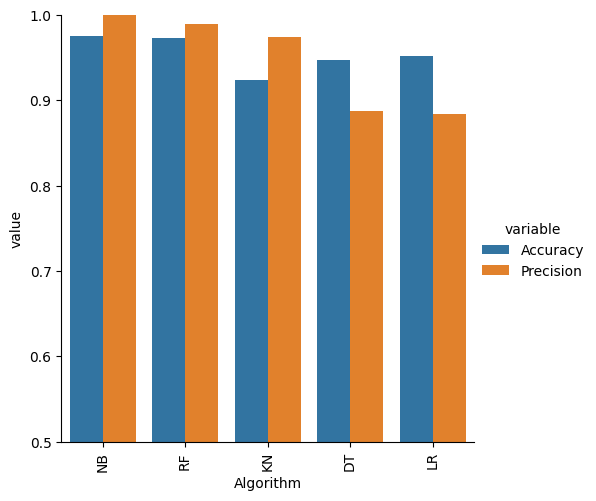

In [435]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

AFTER ANALYZING BEST MODEL WOULD BE MULTINOMIAL NB

In [436]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))